# EE675A - Assignment 1

**Name:*Subhrajit Mishra*  <br />
**Roll No:*201006*
***
## Instructions

- **Release Date**: **21st Jan 2024**  
- **Deadline**: **Part B : 4th Feb 2024 11:59PM**
- Kindly name your submission files as `RollNo_Name_A1_PartB.ipynb`, based on the part you are submitting. Marks will be deducted for all submissions that do not follow the naming guidelines. <br />
- You are required to work out your answers and submit only the iPython Notebook. The code should be well commented and easy to understand as there are marks for this. This notebook can be used as a template for assignment submission. <br />
- Submissions are to be made through HelloIITK portal. Submissions made through mail will not be graded.<br />
- Answers to the theory questions if any should be included in the notebook itself. While using special symbols use the $\LaTeX$ mode <br />
- Make sure your plots are clear and have title, legends and clear lines, etc. <br />
- Plagiarism of any form will not be tolerated. If your solutions are found to match with other students or from other uncited sources, there will be heavy penalties and the incident will be reported to the disciplinary authorities. <br />
- In case you have any doubts, feel free to reach out to TAs for help. <br />

***
## Introduction

You are free to use parts of the given code but may also choose to write the whole thing on your own.  
The illustrations for Part-B are adapted from [Alejandro's blog post](https://medium.com/@alejandro.aristizabal24/understanding-reinforcement-learning-hands-on-part-2-multi-armed-bandits-526592072bdc) on Multi-Armed Bandits. Throughout the course we will be using the [Gymnasium toolkit](https://gymnasium.farama.org/index.html) for the assignements so before starting you may want to go through the [basic usage](https://gymnasium.farama.org/content/basic_usage/) and basics of gymnasium and the installation procedure.

***
## Part B questions

Now that we have familiarized ourselves with the basic setup let us test a few more stratergies as part of the assignment problem.

Consider a two-armed Bernoulli bandit scenario with true means given by $\mu_1 = \frac{1}{2}, \mu_2= \frac{1}{2}+\Delta$, for some $\Delta < \frac{1}{2}$. Let the time horizon be $T=10000$. `[20 Marks]`

### B1
Take $\Delta=\frac{1}{4}$ and run the Monte Carlo simulations to estimate the expected regret of the ETC algorithm which explores each arm $m = T^{2/3} (\log T)^{1/3}$ times before committing. Specifically, you run the ETC algorithm to compute the sample regret 
$$ \mu_2 * T - \sum_{t=1}^T R_t, $$ 
where $R_t$ is the reward obtained in time step $t$.

Repeat this experiment 500 times and estimate the expected regret by taking the average of the sample regrets you obtained in all those 500 experiments. `[5 Marks]`

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

In [12]:
def ETC(delta):    
    exp_reg = 0
    for i in range(1, 501):
        mu1 = 1/2
        mu2 = 1/2 + delta
        T = 10000

        m = int(T**(2/3) * (np.log(T))**(1/3))

        ran_val1 = np.random.binomial(n=1, p=mu1, size=m)
        ran_val2 = np.random.binomial(n=1, p=mu2, size=m)

        regret = mu2*T
        reward = sum(ran_val1) + sum(ran_val2)

        av1 = np.mean(ran_val1)
        av2 = np.mean(ran_val2)
        rem = T-m-m

        if av1>av2:
            exploit = np.random.binomial(n=1, p=mu1, size=rem)
        else:
            exploit = np.random.binomial(1, mu2, rem)
            
        reward += sum(exploit)
        regret -= reward
        exp_reg += regret

    exp_reg /= 500
    return exp_reg

del_vals = [1/4]
ans = 0
for i in del_vals:
    ans+= ETC(i)

print(ans)

242.484


### B2

Repeat the above for various values of $\Delta \in \{0.05, 0.1, 0.2, 0.3, 0.4, 0.45\}$ and plot the estimated regret as a function of $\Delta$ and verify whether it satisfies the regret upper bound we derived in class. `[5 Marks]`

In [13]:
# write your code for the above part here

del_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.45]
regrets_ETC = []
max_val_ETC = []
T = 10000
mv = T**(2/3) * (np.log(T))**(1/3)
print(mv)
for i in del_vals:
    regrets_ETC.append(ETC(i))
    max_val_ETC.append(mv)

print(regrets_ETC)

972.9530713186152
[53.756, 98.856, 196.348, 286.002, 387.422, 437.56]


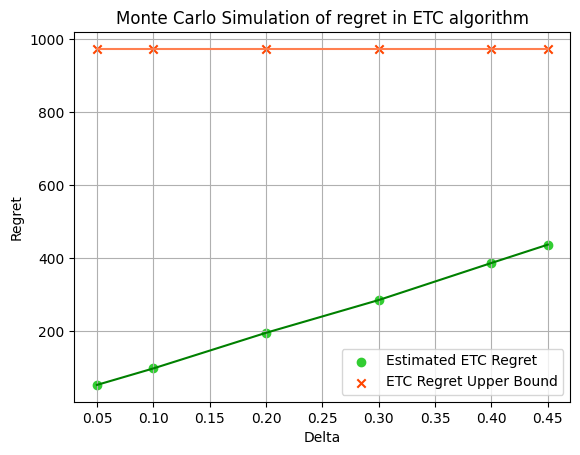

In [14]:
plt.figure()
plt.scatter(del_vals, regrets_ETC, label='Estimated ETC Regret', color='limegreen')
plt.plot(del_vals, regrets_ETC, linestyle='-', color='green')
plt.scatter(del_vals, max_val_ETC, label='ETC Regret Upper Bound', marker = 'x', color='orangered')
plt.plot(del_vals, max_val_ETC, linestyle='-', color='coral')
plt.xlabel('Delta')
plt.ylabel('Regret')
plt.title('Monte Carlo Simulation of regret in ETC algorithm')
plt.legend()
plt.grid('True')
plt.show()

### B3 
Repeat the experiment with the UCB algorithm and plot the comparison with ETC. `[10 Marks]`

In [15]:
# write your code for the above part here
def UCB(delta):
    av_reg = 0
    for tm in tqdm(range(0, 500)):
        T = 10000
        mu1 = 1/2
        mu2 = 1/2 + delta
        sam1 = np.random.binomial(1, mu1, T)
        av1 = sam1[0]
        c1 = 1
        sam2 = np.random.binomial(1, mu2, T)
        av2 = sam2[0]
        c2 = 1
        reward = av1+av2
        regret = mu2*T
        ep = np.sqrt((3*np.log(T))/(2))
        for i in range(3, T+1):
            epsilon_t1 = ep/np.sqrt(c1)
            epsilon_t2 = ep/np.sqrt(c2)
            ub1 = av1+epsilon_t1
            ub2 = av2+epsilon_t2
            if ub1>ub2:
                c1 +=1
                av1 = (av1*(c1-1)+sam1[c1-1])/c1
                reward+=sam1[c1-1]
            else:
                c2 +=1
                av2 = (av2*(c2-1)+sam2[c2-1])/c2
                reward+=sam2[c2-1]

        regret -= reward
        av_reg+=regret
    av_reg/=500
    print(av_reg)
    return av_reg

In [16]:
# This block takes around 1 to 1.5 minutes to run.

del_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.45]
regrets_UCB = []
max_val_UCB = []
T = 10000
mv = np.sqrt(2*T*np.log(T))
print(mv)
for i in del_vals:
    regrets_UCB.append(UCB(i))
    max_val_UCB.append(mv)

429.19320525786947


100%|██████████| 500/500 [00:11<00:00, 44.45it/s]


84.562


100%|██████████| 500/500 [00:10<00:00, 46.06it/s]


77.792


100%|██████████| 500/500 [00:10<00:00, 46.20it/s]


51.998


100%|██████████| 500/500 [00:10<00:00, 46.45it/s]


39.638


100%|██████████| 500/500 [00:10<00:00, 46.41it/s]


25.776


100%|██████████| 500/500 [00:10<00:00, 46.59it/s]

25.87


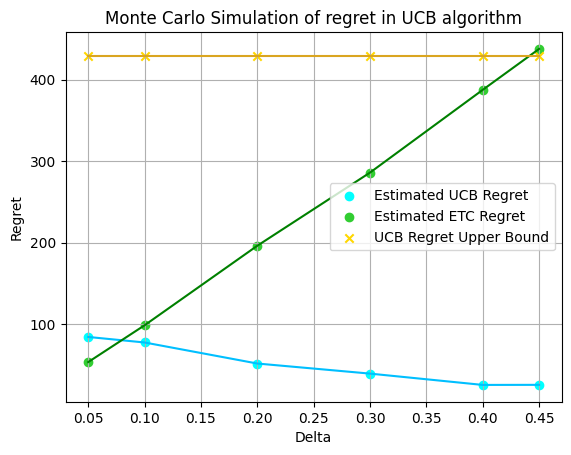

In [17]:
plt.figure()
plt.scatter(del_vals, regrets_UCB, label='Estimated UCB Regret', color='cyan')
plt.plot(del_vals, regrets_UCB, linestyle='-', color='deepskyblue')
plt.scatter(del_vals, regrets_ETC, label='Estimated ETC Regret', color='limegreen')
plt.plot(del_vals, regrets_ETC, linestyle='-', color='green')
plt.scatter(del_vals, max_val_UCB, label='UCB Regret Upper Bound', marker = 'x', color='gold')
plt.plot(del_vals, max_val_UCB, linestyle='-', color='goldenrod')
plt.xlabel('Delta')
plt.ylabel('Regret')
plt.title('Monte Carlo Simulation of regret in UCB algorithm')
plt.legend()
# plt.ylim(0, 1500)
# plt.xlim(0, 0.5)
plt.grid('True')
plt.show()

### B4
(**Bonus**) In the ETC algorithm, assume that we know $\Delta$, and choose a better $m$ as function of $\Delta$ and repeat the experiments and compare with UCB. What did you observe?

Hint: Check how many samples of exploration are required to make $\epsilon < \frac{\Delta}{2}$ with a high probability of $1-\frac{1}{T}$. `[5 Marks]`

In [18]:
# write your code for the above part here

def ETC_rev(delta):    
    exp_reg = 0
    for i in range(1, 501):
        mu1 = 1/2
        mu2 = 1/2 + delta
        T = 10000

        m = (int)((2/delta**2)*np.log(2*T)/2)

        # Generate random values from the Bernoulli distribution
        ran_val1 = np.random.binomial(n=1, p=mu1, size=m)
        ran_val2 = np.random.binomial(n=1, p=mu2, size=m)

        regret = mu2*T
        reward = sum(ran_val1) + sum(ran_val2)

        av1 = np.mean(ran_val1)
        av2 = np.mean(ran_val2)
        rem = T-m-m

        if av1>av2:
            exploit = np.random.binomial(n=1, p=mu1, size=rem)
        else:
            exploit = np.random.binomial(1, mu2, rem)

        reward += sum(exploit)
        regret -= reward
        exp_reg += regret

    exp_reg /= 500
    return exp_reg


In [19]:
del_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.45]
regrets = []
UCB_regret = []

for i in del_vals:
    regrets.append(ETC_rev(i))
    # UCB_regret.append(UCB(i))
print(regrets)

[201.002, 96.714, 48.63, 31.55, 24.69, 21.642]


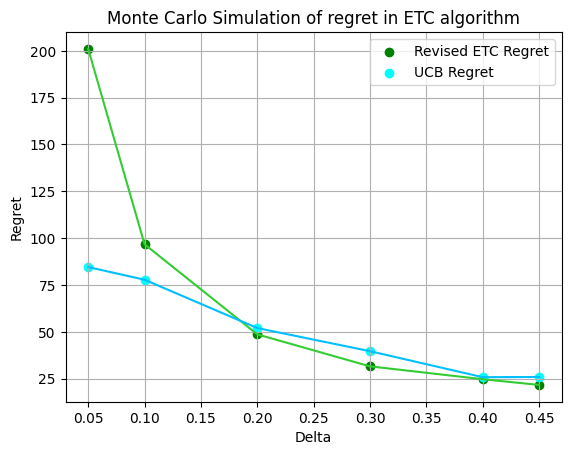

In [20]:
plt.clf
plt.figure()
plt.scatter(del_vals, regrets, label='Revised ETC Regret', color='green')
plt.plot(del_vals, regrets, linestyle='-', color='limegreen')
plt.scatter(del_vals, regrets_UCB, label='UCB Regret', color='cyan')
plt.plot(del_vals, regrets_UCB, linestyle='-', color='deepskyblue')
# plt.scatter(del_vals, UCB_regret, label='UCB Regret', color='cyan')
# plt.plot(del_vals, UCB_regret, linestyle='-', color='deepskyblue')
plt.xlabel('Delta')
plt.ylabel('Regret')
plt.title('Monte Carlo Simulation of regret in ETC algorithm')
plt.legend()
plt.grid('True')
plt.show()